In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
df_cars = pd.read_csv("Car_Price_Prediction.csv")

In [4]:
# check if the dataframe has null values
df_cars.isnull().sum()

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

In [5]:
df_cars.head(3)

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347


In [6]:
# get the data types  dataframe
df_cars.dtypes

Make             object
Model            object
Year              int64
Engine Size     float64
Mileage           int64
Fuel Type        object
Transmission     object
Price           float64
dtype: object

In [7]:
# define the dependet and independent values
x = df_cars[["Year", "Engine Size", "Mileage"]]
y = df_cars["Price"]

In [8]:
# add constant and fit the linear model
x = sm.add_constant(x)
lm = sm.OLS(y, x).fit()

In [9]:
# predict the values
lm.predict(x)

0      30613.486515
1      24825.588780
2      25193.875037
3      27371.892531
4      20848.269294
           ...     
995    23418.571189
996    27966.230940
997    17211.850645
998    29033.840506
999    31796.045677
Length: 1000, dtype: float64

In [10]:
# the regression table
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1737.
Date:                Sat, 27 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:16:58   Log-Likelihood:                -9056.5
No. Observations:                1000   AIC:                         1.812e+04
Df Residuals:                     996   BIC:                         1.814e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.008e+06    2.1e+04    -47.943      0.000   -1.05e+06   -9.67e+05
Year          513.7183     10.461     49.110      0.000     493.191     534.246
Engine Size  1938.9185     64.230     30.187      0.000    1812.876    2064.961
Mileage        -0.0489      0.001    -44.193      0.000      -0.051      -0.047
==============================================================================
Omnibus:                        0.247   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.152
Skew:                          -0.001   Prob(JB):                        0.927
Kurtosis:                       3.060   Cond. No.                     3.65e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# regression equation: y = ax + b
y_pred = 513.7183*x["Year"] + 1938.9185*x["Engine Size"] + -0.0489*x["Mileage"] - 1.008e+06

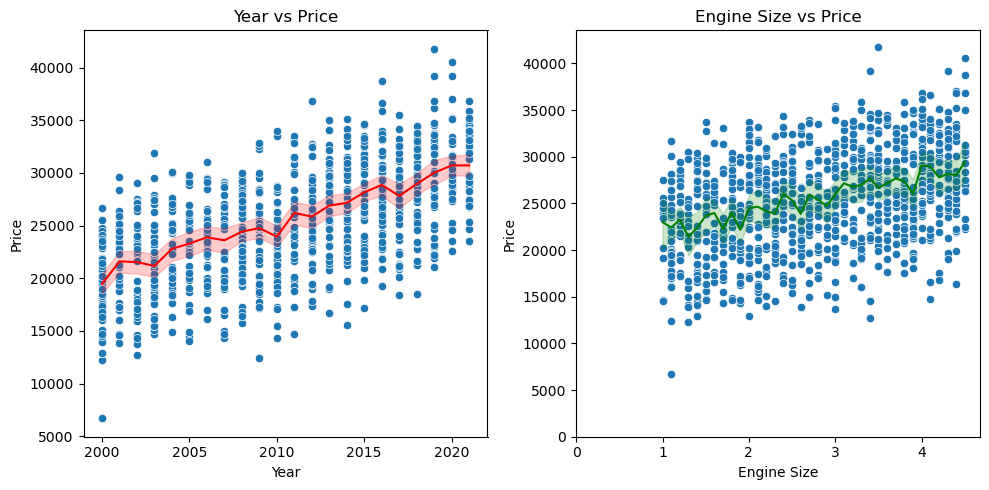

In [12]:
# plot the scatterplot and lineplot
plt.figure(figsize=(10,5), tight_layout=True)
plt.subplot(1,2,1)
sns.scatterplot(x=x["Year"], y=y)
sns.lineplot(x=x["Year"], y=y_pred, color="red")
plt.title("Year vs Price")
plt.subplot(1,2,2)
sns.scatterplot(x=x["Engine Size"], y=y)
sns.lineplot(x=x["Engine Size"], y=y_pred, color="green")
plt.title("Engine Size vs Price")
plt.xlim(0)
plt.ylim(0)
plt.show()

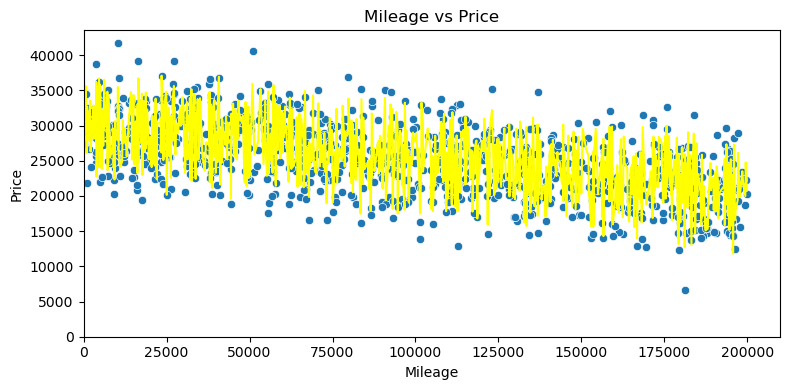

In [13]:
plt.figure(figsize=(8,4), tight_layout=True)
sns.scatterplot(x=x["Mileage"], y=y)
sns.lineplot(x=x["Mileage"], y=y_pred, color="yellow")
plt.title("Mileage vs Price")
plt.xlim(0)
plt.ylim(0)
plt.show()

In [14]:
df_cars.sort_values("Mileage", ascending=False)

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
423,Audi,Model D,2008,3.6,199867,Diesel,Automatic,20218.692272
761,Ford,Model A,2015,3.8,199521,Electric,Automatic,22239.705809
451,Audi,Model A,2011,2.4,199416,Electric,Manual,18747.469660
780,Toyota,Model B,2014,2.5,198768,Petrol,Automatic,22455.217982
560,Toyota,Model E,2014,3.4,198511,Electric,Automatic,23402.508003
...,...,...,...,...,...,...,...,...
892,Audi,Model E,2007,1.6,908,Diesel,Automatic,21866.612814
628,Honda,Model B,2018,3.6,557,Electric,Automatic,34453.883955
234,Audi,Model A,2008,2.9,319,Electric,Automatic,29536.759777
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708
